<a href="https://colab.research.google.com/github/YujinCHACHA/-project-FOI_KHN/blob/main/3_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 import

In [ ]:
pip install fast_ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 KB 1.5 MB/s eta 0:00:00


In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras.models
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from fast_ml.model_development import train_valid_test_split

In [ ]:
import pandas as pd

# 데이터 불러오기 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Special class/data_scaled_final.csv')

In [ ]:
data = data.drop(columns = ['Unnamed: 0'])

In [ ]:
data= data[['고혈압 의사진단 여부(부)','교육수준 재분류 코드','교육수준: 학력','(성인) 유년기환경: 아버지 교육수준','(성인) 유년기환경: 어머니 교육수준','소득 5분위수(가구)','가구 세대구성코드_4','소득 4분위수(가구)','가구원수','지방','최종 이완기 혈압(2,3차 평균)','직업재분류 및 실업/비경제활동 상태 코드_1','(만12세이상) 한 번에 마시는 음주량']]

# train-test split

In [ ]:
#X = data[['만나이','가구 세대구성코드_2','기혼|사별','결혼상태','혈중요소질소','직업재분류 및 실업/비경제활동 상태 코드_4','가구 세대구성코드_1','교육수준 재분류 코드','교육수준: 학력','(성인) 유년기환경: 아버지 교육수준','(성인) 유년기환경: 어머니 교육수준','고혈압 의사진단 여부(형제자매)','소득 5분위수(가구)','가구 세대구성코드_4','소득 4분위수(가구)','가구원수','지방','최종 이완기 혈압(2,3차 평균)','직업재분류 및 실업/비경제활동 상태 코드_1','(만12세이상) 한 번에 마시는 음주량']]
#Y = data['고혈압 의사진단 여부(부)']

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data, target = '고혈압 의사진단 여부(부)', 
                                                                            train_size=0.7, valid_size=0.2, test_size=0.1)

In [ ]:
valid = pd.concat([X_valid,y_valid])

# binary classification 파이프라인

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.experimental import AdamW

In [ ]:
classifier = Sequential()

classifier.add(Dense(units=10, input_dim=12,kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dense(units=8, kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dense(units=6, kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=3, kernel_initializer='he_uniform'))
classifier.add(BatchNormalization())
classifier.add(Activation('relu'))
classifier.add(Dense(units=1,kernel_initializer='he_uniform'))
classifier.add(Activation('sigmoid'))

optim = AdamW(learning_rate=0.001)
classifier.compile(optimizer=optim,loss='MeanSquaredError', metrics=['MAE'])

ANN_Model=classifier.fit(X_train,y_train, validation_data = (X_valid, y_valid),batch_size=8, epochs=100, verbose=1)
#ANN_Model=classifier.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 10 epochs=10, verbose=1)
 # Train set's 1~2%, current = 1~2% epochs = 500, # Train set's 10%, current = 20% verbose = 1, # 0=silent, 1=progress bar, 2=one line per epoch. )

Epoch 1/100
2408/2408 [==============================] - 9s 3ms/step - loss: 0.1677 - MAE: 0.3476 - val_loss: 0.1473 - val_MAE: 0.3018
Epoch 2/100
2408/2408 [==============================] - 8s 3ms/step - loss: 0.1494 - MAE: 0.3005 - val_loss: 0.1459 - val_MAE: 0.2931
Epoch 3/100
2408/2408 [==============================] - 6s 3ms/step - loss: 0.1483 - MAE: 0.2959 - val_loss: 0.1455 - val_MAE: 0.3005
Epoch 4/100
2408/2408 [==============================] - 7s 3ms/step - loss: 0.1479 - MAE: 0.2964 - val_loss: 0.1453 - val_MAE: 0.2962
Epoch 5/100
2408/2408 [==============================] - 6s 3ms/step - loss: 0.1477 - MAE: 0.2950 - val_loss: 0.1454 - val_MAE: 0.2915
Epoch 6/100
2408/2408 [==============================] - 7s 3ms/step - loss: 0.1471 - MAE: 0.2938 - val_loss: 0.1452 - val_MAE: 0.2987
Epoch 7/100
2408/2408 [==============================] - 7s 3ms/step - loss: 0.1473 - MAE: 0.2946 - val_loss: 0.1450 - val_MAE: 0.2959
Epoch 8/100
2408/2408 [==============================] 

In [ ]:
ANN_inf=classifier.predict(X_valid)

172/172 [==============================] - 0s 1ms/step


In [ ]:
ANN_inf

array([[0.0781612 ],
       [0.27628207],
       [0.25711745],
       ...,
       [0.24809256],
       [0.10979054],
       [0.24163705]], dtype=float32)

In [ ]:
len(y_valid)

5503

In [ ]:
ANN_inf.shape

(5503, 1)

In [ ]:
history = ANN_Model

In [ ]:
from tensorflow.keras.models import Model

172/172 - 0s - loss: 0.1444 - MAE: 0.2912 - 191ms/epoch - 1ms/step


ValueError: ignored

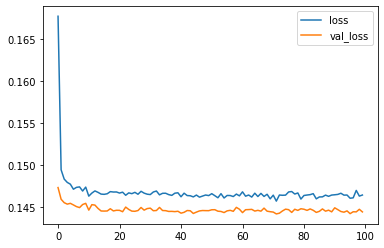

In [ ]:
# loss and acc graph (train nd val)
history_df = pd.DataFrame(history.history)
history_df[["loss", "val_loss"]].plot()

    # Acc and Loss about real data
learning_loss, _ = classifier.evaluate(X_valid, y_valid, verbose=2)
y_pred = classifier.predict(ANN_inf)

print("Learning loss(MSE) % :", learning_loss * 100)
print("Learning accuracy(MSE) % :", 100 - (learning_loss * 100))